---
# Epoch experiment

In [2]:
from linescanning import (
    utils,
    plotting,
    fitting,
    dataset
)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
opj = os.path.join

In [3]:
# get h5-file
deriv = "/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives"
subject = "sub-003"
sesID = 4
data_file = opj(deriv, "lsprep", subject, f"{subject}_ses-{sesID}_desc-preproc_bold.h5")

# load in
obj_ = dataset.Dataset(
    data_file,
    verbose=True
)

DATASET
Reading from /data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/lsprep/sub-003/sub-003_ses-4_desc-preproc_bold.h5
 Set attribute: df_blinks
 Set attribute: df_func_ica
 Set attribute: df_func_psc
 Set attribute: df_func_raw
 Set attribute: df_onsets
 Set attribute: df_responses
 Could not set attribute 'df_saccades'
 Set attribute: df_space_eye
 Set attribute: df_space_func

DATASET: created


In [4]:
df_onsets = obj_.fetch_onsets()
df_func = obj_.fetch_fmri(dtype="raw")
df_filt = obj_.fetch_fmri(dtype="psc")
df_func

Fetching dataframe from attribute 'df_func_raw'
Fetching dataframe from attribute 'df_func_psc'


vox 0     vox 1     vox 2     vox 3  \
subject task     run t                                                 
003     contrast 1   0.000    2.745836  2.977858  3.345189  3.266751   
                     0.105    2.751113  3.352343  3.769273  3.035718   
                     0.210    2.523618  3.057453  3.329320  3.057132   
                     0.315    2.707394  3.439686  3.893157  3.121706   
                     0.420    2.438953  3.460924  3.546874  3.009885   
...                                ...       ...       ...       ...   
        fixation 5   377.475  2.934058  4.665491  4.394603  3.537736   
                     377.580  3.241965  4.644714  4.582903  3.336575   
                     377.685  2.892435  4.507555  4.486478  3.611844   
                     377.790  2.826659  4.623318  4.308166  3.571071   
                     377.895  2.841717  4.414508  4.298820  3.781844   

                                 vox 4     vox 5     vox 6     vox 7  \
subject task     run t                                                 
003     contrast 1   0.000    3.319040  3.100726  2.745428  2.616193   
                     0.105    3.122288  3.370957  2.872158  3.191073   
                     0.210    3.056043  3.285392  3.137628  3.487301   
                     0.315    3.585051  3.233034  3.239446  3.528007   
                     0.420    3.503435  3.307806  3.246713  3.360288   
...                                ...       ...       ...       ...   
        fixation 5   377.475  3.742721  3.843606  3.484847  3.373892   
                     377.580  3.835903  4.044688  3.533077  3.566758   
                     377.685  3.655481  3.829476  3.669585  3.379302   
                     377.790  3.866953  3.479540  3.870011  3.500664   
                     377.895  3.553681  3.925885  3.493650  3.586646   

                                 vox 8     vox 9  ...   vox 710   vox 711  \
subject task     run t                            ...                       
003     contrast 1   0.000    2.789387  3.002763  ...  0.834353  0.552213   
                     0.105    3.335721  3.266857  ...  0.732564  0.810855   
                     0.210    2.957406  3.141177  ...  0.868669  0.557718   
                     0.315    3.256708  3.383597  ...  1.038193  0.653662   
                     0.420    3.490055  3.261584  ...  0.812736  0.468650   
...                                ...       ...  ...       ...       ...   
        fixation 5   377.475  3.412946  3.461884  ...  0.374884  0.381849   
                     377.580  3.665597  3.774065  ...  0.811051  0.312699   
                     377.685  3.392775  3.363408  ...  0.558239  0.742998   
                     377.790  3.510201  3.641403  ...  0.598589  0.670104   
                     377.895  3.550877  3.912715  ...  0.426877  0.420305   

                               vox 712   vox 713   vox 714   vox 715  \
subject task     run t                                                 
003     contrast 1   0.000    0.868808  0.490237  0.852822  0.481497   
                     0.105    0.910538  0.906178  0.654552  0.508110   
                     0.210    0.553167  0.686179  1.037082  0.703583   
                     0.315    0.678958  0.769250  0.771305  0.697009   
                     0.420    0.734888  0.468269  0.652232  0.697286   
...                                ...       ...       ...       ...   
        fixation 5   377.475  0.448147  0.606124  1.052474  0.601908   
                     377.580  0.824418  0.620314  0.434787  0.824665   
                     377.685  0.602486  0.732037  1.104378  0.626487   
                     377.790  0.419314  0.806321  0.401894  0.415445   
                     377.895  0.862576  0.755339  0.537428  0.606874   

                               vox 716   vox 717   vox 718   vox 719  
subject task     run t                                                
003     contrast 1   0.000    0.586952  0.670727  0.472291  0.544578  
       

In [5]:
fig_dir = f"/data1/projects/MicroFunc/Jurjen/programs/project_repos/holeresponse/images/{subject}"
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir, exist_ok=True)

In [6]:
# ribbon = (355,362) # sub-010
ribbon = (357,365) # sub-003
df_ribbon = utils.select_from_df(
    df_filt, 
    expression="ribbon", 
    indices=ribbon
)
df_ribbon

vox 357   vox 358   vox 359   vox 360  \
subject task     run t                                                 
003     contrast 1   0.000   -1.084251  0.344673  0.604187  1.907845   
                     0.105    1.118889  4.384300  2.629494  2.123398   
                     0.210    0.259811  1.121651  2.208656  2.755066   
                     0.315   -0.260727 -0.124931 -1.070297 -0.058456   
                     0.420   -3.486412 -0.673157  0.505447  2.079460   
...                                ...       ...       ...       ...   
        fixation 5   377.475  1.250038 -0.180305 -0.033310  0.686607   
                     377.580  2.542801  1.468559  0.544296  0.522820   
                     377.685  0.064453  0.093224  1.044556  1.274010   
                     377.790  2.049393  1.985748  0.125565  0.543655   
                     377.895 -0.792076  0.753990  1.074806  0.832619   

                               vox 361   vox 362   vox 363   vox 364  
subject task     run t                                                
003     contrast 1   0.000    1.249336  1.177979  0.537399  0.848122  
                     0.105    1.204773  1.807564  1.382835  0.483009  
                     0.210    2.088554  1.391861  0.037933 -0.095230  
                     0.315    0.631126  0.217476  0.294914  0.070358  
                     0.420    1.757324  1.586647  0.353531  0.181221  
...                                ...       ...       ...       ...  
        fixation 5   377.475  0.711449  0.079918  0.163162  0.611511  
                     377.580  0.573975  0.482208  1.279472  0.427940  
                     377.685  0.424545  0.185410  0.226799 -0.015015  
                     377.790  1.194824  0.744949  0.604912  0.291290  
                     377.895  0.645233  0.313507  0.443779  0.589104  

[36000 rows x 8 columns]

In [7]:
df_avg = pd.DataFrame(df_ribbon.mean(axis=1))
df_avg

0
subject task     run t                
003     contrast 1   0.000    0.698161
                     0.105    1.891783
                     0.210    1.221038
                     0.315   -0.037567
                     0.420    0.288008
...                                ...
        fixation 5   377.475  0.411134
                     377.580  0.980259
                     377.685  0.412248
                     377.790  0.942542
                     377.895  0.482620

[36000 rows x 1 columns]

In [8]:
df_stims = utils.select_from_df(df_onsets) #, expression=f"event_type != response")
df_stims

onset
subject task     run event_type            
003     contrast 1   blink         3.071000
        fixation 1   blink         3.428000
                     response      4.799856
        contrast 1   blink         6.509000
        fixation 1   blink         9.050000
...                                     ...
                     response    359.581444
        contrast 1   blink       361.916000
        fixation 1   response    366.889739
                     blink       367.507000
        contrast 1   blink       372.998000

[181 rows x 1 columns]

In [9]:
def _get_timepoints(interval,TR):
    total_length = interval[1] - interval[0]
    timepoints = np.linspace(
        interval[0],
        interval[1],
        int(total_length * (1/TR) * 1),
        endpoint=False)
    
    return timepoints

In [33]:
def epoch_dataframe(
    df_func,
    df_onsets, 
    interval=[-2,14], 
    TR=0.105,
    index=False,
    ):

    ev_epochs = []

    info = {}
    for el in ["event_type","subject","run","task"]:
        info[el] = utils.get_unique_ids(df_onsets, id=el)

    for ev in info["event_type"]:

        epochs = []
        ev_onsets = utils.select_from_df(df_onsets, expression=f"event_type = {ev}")
        for t in ev_onsets.onset.values:
            
            if ev not in ["response","blink"]:
                # find closest ID to interval
                t_start = t-abs(interval[0])
                ix_start = int(t_start/TR)

                samples = interval[1]+abs(interval[0])
                n_sampl = int(samples/TR)
                ix_end = ix_start+n_sampl

                # extract from data
                stim_epoch = df_func.iloc[ix_start:ix_end,:].values #[...,np.newaxis]        
                epochs.append(stim_epoch)
        
        # concatenate into 3d array (time,ev,stimulus_nr), average, and store in dataframe
        ev_epoch = np.concatenate(epochs, axis=-1)
        avg_ev = pd.DataFrame(ev_epoch)

        # format dataframe
        time = _get_timepoints(interval, TR)
        avg_ev["subject"], avg_ev["task"], avg_ev["run"],avg_ev["t"], avg_ev["event_type"] = info["subject"][0],info["task"][0],info["run"][0],time,ev
        
        ev_epochs.append(avg_ev)

    # concatenate into dataframe
    df_epochs = pd.concat(ev_epochs)

    # set index or not
    if index:
        df_epochs.set_index(["subject","task","run","event_type","t"], inplace=True)

    return df_epochs

In [97]:
# define functional dataframe here
func = df_avg.copy()

# read task IDs
task_ids = utils.get_unique_ids(func, id="task")

# loop through task IDs
task_df = [] 
for task in task_ids:

    # extract task-specific dataframes
    expr = f"task = {task}"
    task_func = utils.select_from_df(func, expression=expr)
    task_stims = utils.select_from_df(df_onsets, expression=expr)

    # loop through runs
    run_ids = utils.get_unique_ids(task_func, id="run")
    print(f"task-{task}\t| runs = {run_ids}")
    run_df = []
    for run in run_ids:
        
        expr = f"run = {run}"
        run_func = utils.select_from_df(task_func, expression=expr)
        run_stims = utils.select_from_df(task_stims, expression=expr)

        try:
            # get epochs
            df = epoch_dataframe(
                run_func,
                utils.select_from_df(run_stims, expression=("event_type != response","&","event_type != blink")),
                interval=[-2,14],
                TR=0.105,
                index=False
            )
        except:
            raise ValueError(f"Problem with run-{run} | task-{task}")

        run_df.append(df)

    task_df.append(pd.concat(run_df))

task_df = pd.concat(task_df)
task_df.set_index(["subject","task","run","event_type","t"], inplace=True)

task-contrast	| runs = ['1', '2', '3', '4', '5']
task-fixation	| runs = ['1', '2', '3', '4', '5']


In [36]:
avg_ev = task_df.groupby(["subject","event_type","t"]).mean()
avg_ev

0         1         2         3
subject event_type t                                                 
003     0.7        -2.000000  -0.020675 -0.208422 -0.044451 -0.055221
                   -1.894737  -0.202661 -0.123042  0.320438 -0.223643
                   -1.789474  -0.178788 -0.260965  0.007974  0.174914
                   -1.684211  -0.018079  0.083496  0.192384  0.115562
                   -1.578947  -0.081522 -0.131386  0.025770 -0.072532
...                                 ...       ...       ...       ...
        4.0         13.473684 -0.467278 -0.210201 -0.172688 -0.188318
                    13.578947 -0.405095 -0.155501 -0.222592 -0.049433
                    13.684211 -0.008791 -0.170331  0.030512 -0.151994
                    13.789474 -0.120064 -0.374353 -0.008487 -0.066930
                    13.894737 -0.122162 -0.127952 -0.044582 -0.403678

[608 rows x 4 columns]

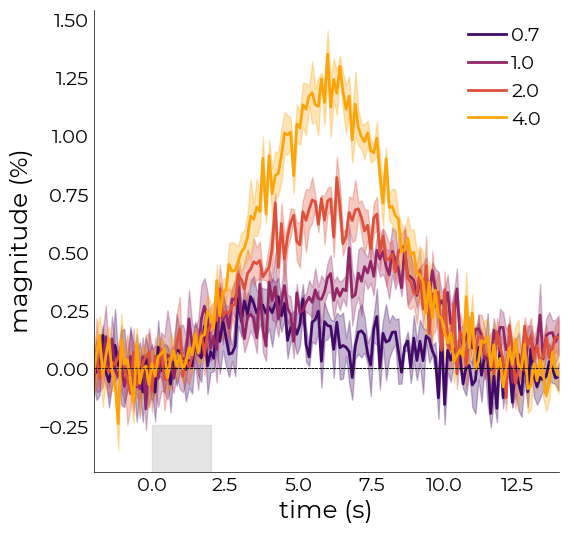

In [67]:
%matplotlib inline

evs = utils.get_unique_ids(avg_ev, id="event_type")
fig,axs = plt.subplots(figsize=(6,6))
colors = sns.color_palette("inferno", len(evs))
for ix,ev in enumerate(evs):

    ddf = utils.select_from_df(avg_ev, expression=f"event_type = {ev}")
    avg_epoch = ddf.mean(axis=1).values
    err = ddf.sem(axis=1).values

    # shift baseline 
    avg_ = []
    for i in range(ddf.shape[-1]):
        d_ = ddf[i].values
        m_ = d_[:20].mean()
        if m_ < 0:
            d_shift = d_+abs(m_)
        else:
            d_shift = d_-m_

        avg_.append(d_shift[...,np.newaxis])

    avg_ = np.concatenate(avg_, axis=1).mean(axis=1)
    t_ = np.unique(ddf.index.get_level_values("t"))
    plotting.LazyPlot(
        avg_,
        xx=t_,
        error=err,
        axs=axs,
        color=colors[ix],
        labels=[ev],
        add_hline=0,
        x_label="time (s)",
        y_label="magnitude (%)",
        line_width=2
    )

axs.axvspan(0,2, ymax=0.1, color="#cccccc", alpha=0.5)
fname = opj(fig_dir, f"{subject}_ses-{sesID}_desc-epoch")
for ext in ["pdf"]:
    fig.savefig(
        f"{fname}.{ext}",
        bbox_inches="tight",
        dpi=300,
        facecolor="white"
    ) 

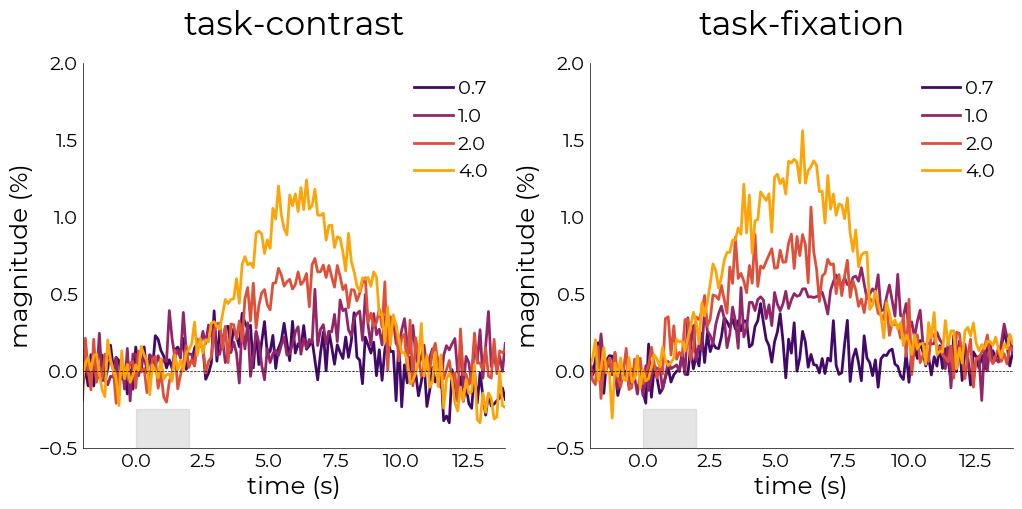

In [15]:
%matplotlib inline
fig,axs = plt.subplots(ncols=len(task_ids), figsize=(6*len(task_ids),5))

for task,ax in zip(task_ids,axs):
    data = utils.select_from_df(task_df, expression=f"task = {task}")
    
    # parse into list
    avg_task = data.groupby(["subject","event_type","t"]).mean()
    avg_epoch = list(avg_task.unstack(["event_type"]).to_numpy().T)

    # shift baseline 
    avg_ = []
    for i in avg_epoch:
        m_ = i[:20].mean()
        if m_ < 0:
            avg_.append(i+abs(m_))
        else:
            avg_.append(i-m_)

    plotting.LazyPlot(
        avg_,
        xx=np.unique(avg_task.index.get_level_values("t")),
        axs=ax,
        cmap="inferno",
        labels=utils.get_unique_ids(avg_task, id="event_type"),
        add_hline=0,
        x_label="time (s)",
        y_label="magnitude (%)",
        line_width=2,
        title=f"task-{task}",
        y_lim=[-0.5,2]
    )

    ax.axvspan(0,2, ymax=0.1, color="#cccccc", alpha=0.5)

fname = opj(fig_dir, f"{subject}_ses-{sesID}_desc-task_epoch")
for ext in ["pdf"]:
    fig.savefig(
        f"{fname}.{ext}",
        bbox_inches="tight",
        dpi=300,
        facecolor="white"
    ) 

In [103]:
def make_single_df(func, onsets):

    task_ids = utils.get_unique_ids(func, id="task")

    new_func = []
    new_onsets = []
    rr = 1
    for t_ix, task in enumerate(task_ids):

        expr = f"task = {task}"
        t_func = utils.select_from_df(func, expression=expr)
        t_onsets = utils.select_from_df(onsets, expression=expr)
        
        run_ids = utils.get_unique_ids(t_func, id="run")
        for r_ix, run in enumerate(run_ids):

            expr = f"run = {run}"
            r_func = utils.select_from_df(t_func, expression=expr).reset_index().drop(["task"], axis=1)
            r_onsets = utils.select_from_df(t_onsets, expression=expr).reset_index().drop(["task"], axis=1)

            r_func["run"] = rr
            r_onsets["run"] = rr

            new_func.append(r_func)
            new_onsets.append(r_onsets)

            rr += 1

    df_func = pd.concat(new_func).set_index(["subject","run","t"])
    df_onsets = pd.concat(new_onsets).set_index(["subject","run","event_type"])
    
    return df_func,df_onsets

In [105]:
# parse into single dataframe
df_f,df_s = make_single_df(df_ribbon, df_onsets)
df_f.head()

vox 357   vox 358   vox 359   vox 360   vox 361   vox 362  \
subject run t                                                                   
003     1   0.000 -1.084251  0.344673  0.604187  1.907845  1.249336  1.177979   
            0.105  1.118889  4.384300  2.629494  2.123398  1.204773  1.807564   
            0.210  0.259811  1.121651  2.208656  2.755066  2.088554  1.391861   
            0.315 -0.260727 -0.124931 -1.070297 -0.058456  0.631126  0.217476   
            0.420 -3.486412 -0.673157  0.505447  2.079460  1.757324  1.586647   

                    vox 363   vox 364  
subject run t                          
003     1   0.000  0.537399  0.848122  
            0.105  1.382835  0.483009  
            0.210  0.037933 -0.095230  
            0.315  0.294914  0.070358  
            0.420  0.353531  0.181221

In [106]:
epoch_all_runs = make_single_df(task_df, df_onsets)[0].reset_index()
epoch_all_runs.set_index(["subject","run","event_type","t"], inplace=True)
epoch_all_runs

0         1         2         3
subject run event_type t                                                 
003     1   0.7        -2.000000  -0.145087 -1.263893  1.295395  0.008605
                       -1.894737   0.561109 -1.088963  0.556851 -0.633091
                       -1.789474  -1.240362 -0.373722  0.694008  0.419498
                       -1.684211   0.194296 -0.046073  0.699462  0.328726
                       -1.578947  -0.671052 -0.100568  0.866967 -0.401759
...                                     ...       ...       ...       ...
        10  4.0         13.473684 -0.255302  0.160255 -0.175622 -0.721462
                        13.578947 -0.329402  0.126933 -0.457885 -0.709394
                        13.684211  0.190854 -0.473221 -0.326553 -0.126517
                        13.789474  0.033797 -0.137598 -0.372196 -0.582853
                        13.894737 -0.198560 -0.667856  0.023088 -0.850348

[6080 rows x 4 columns]

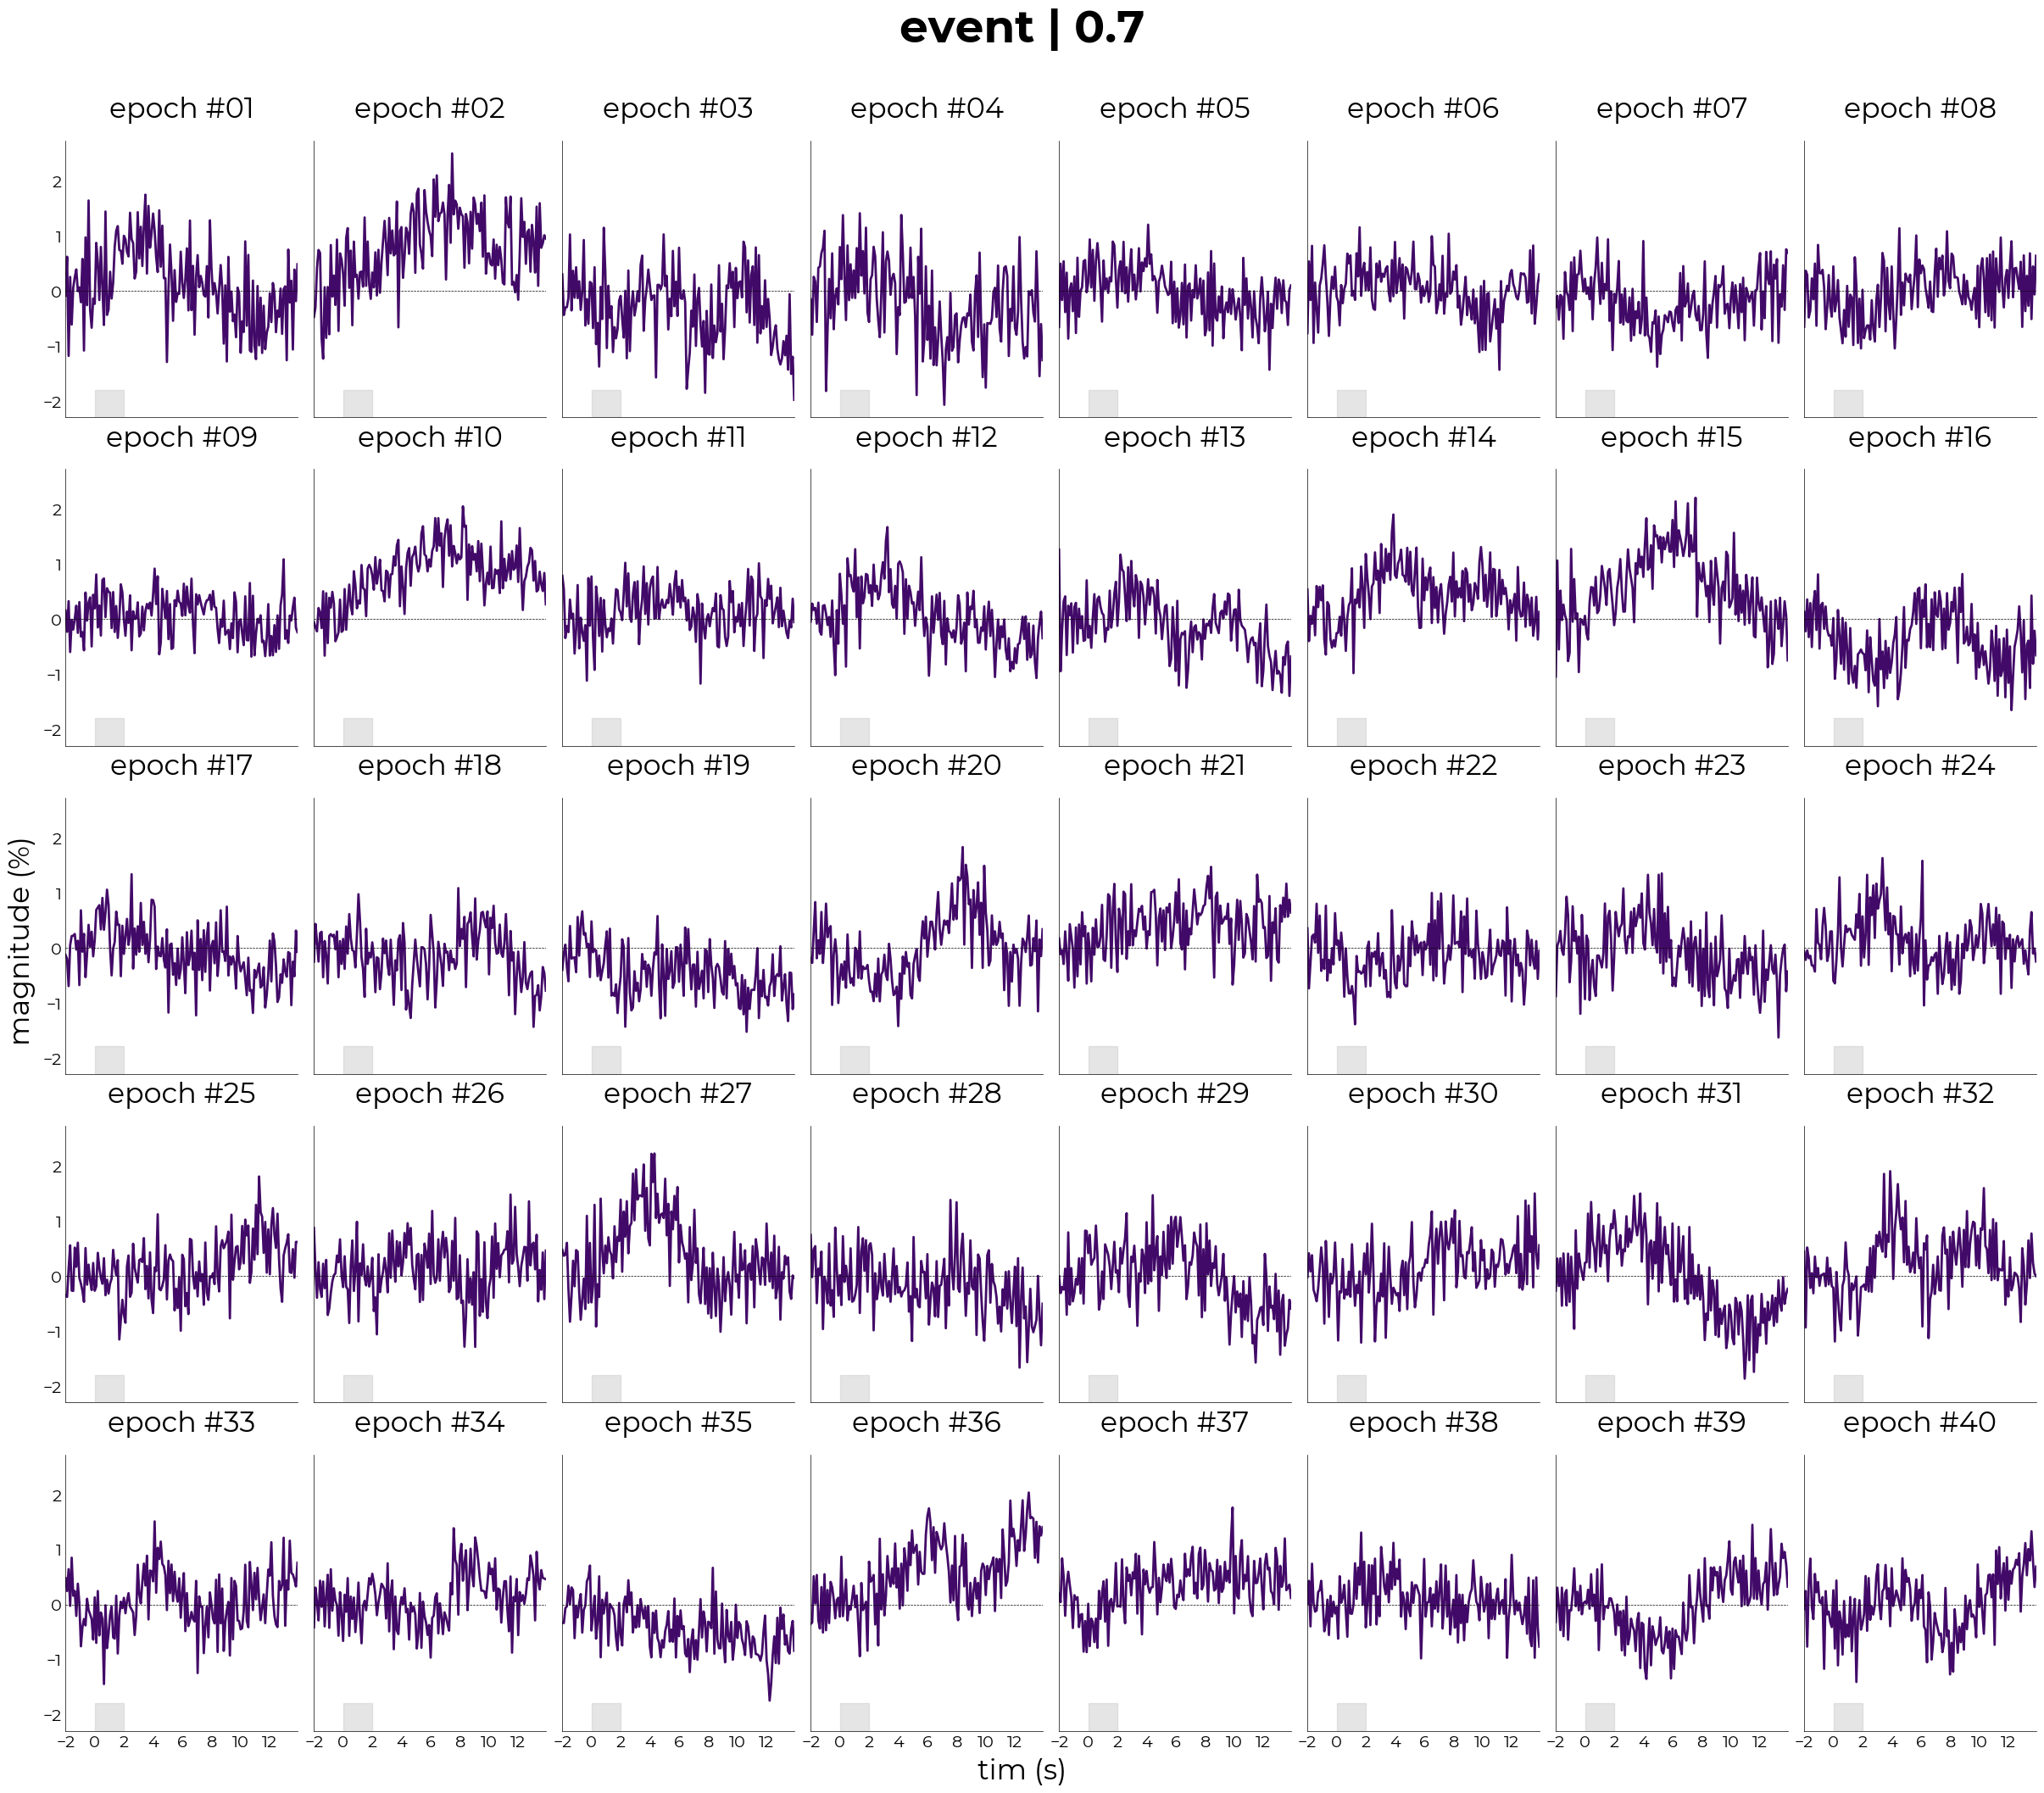

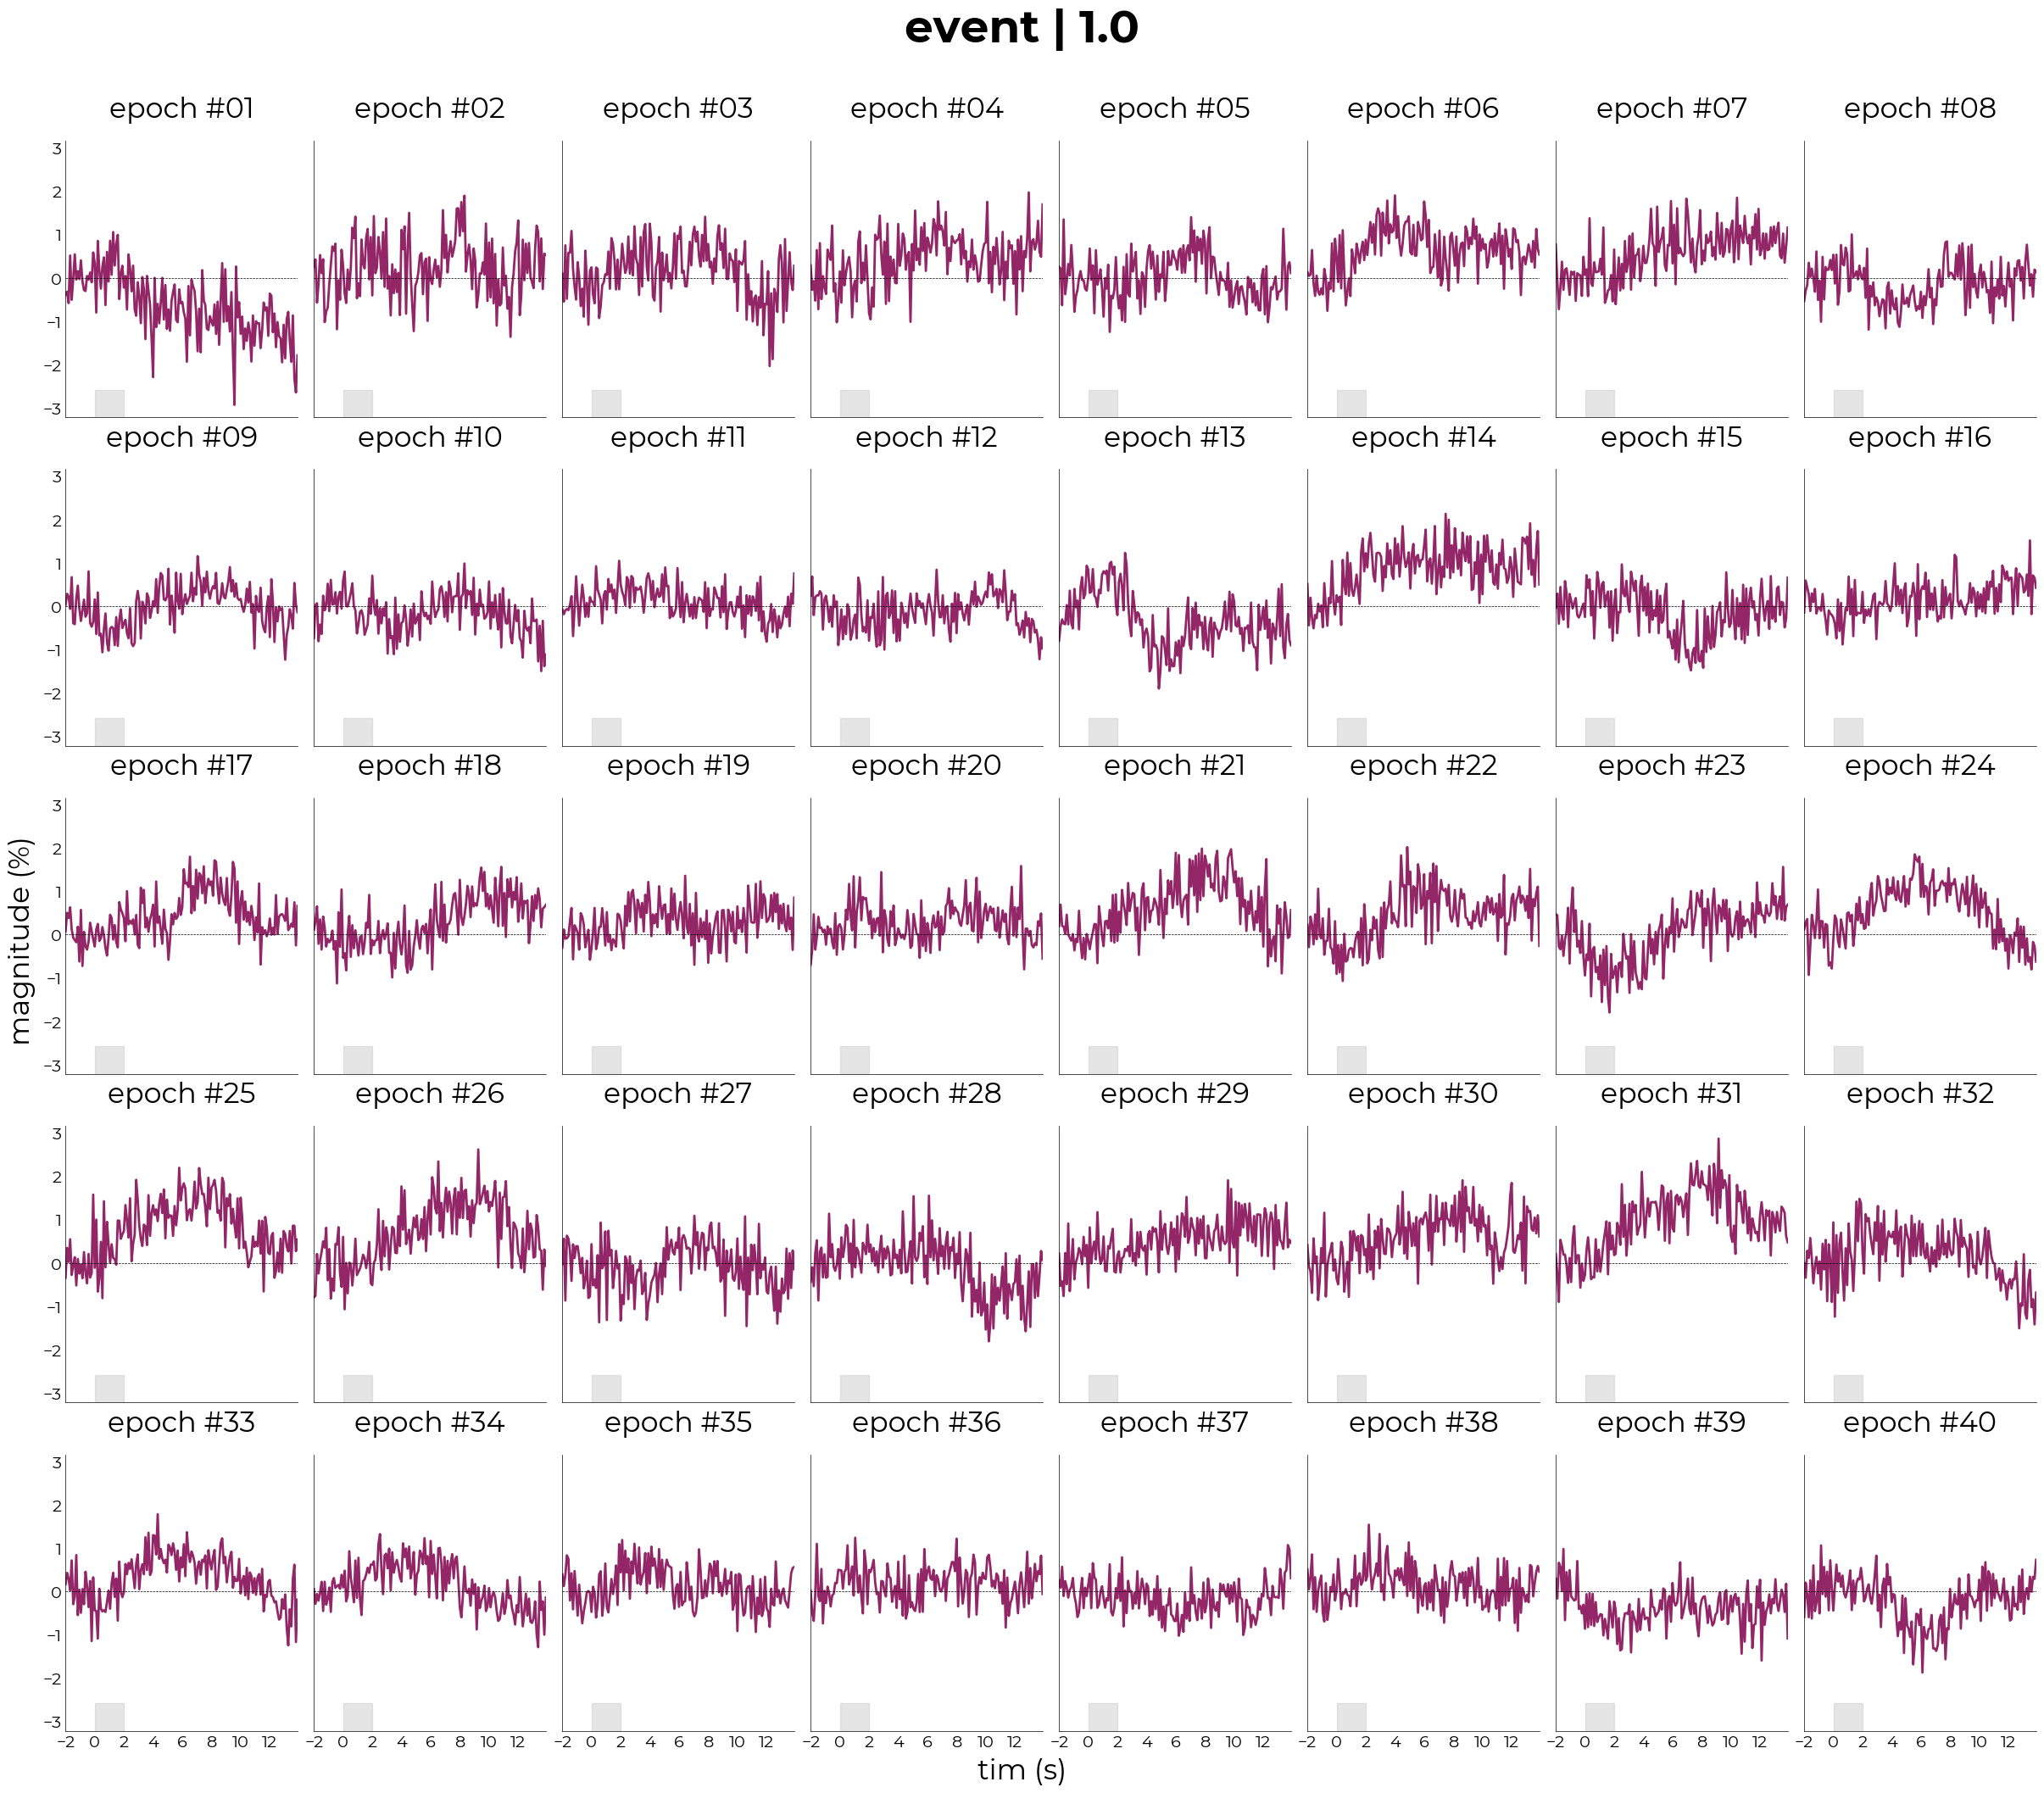

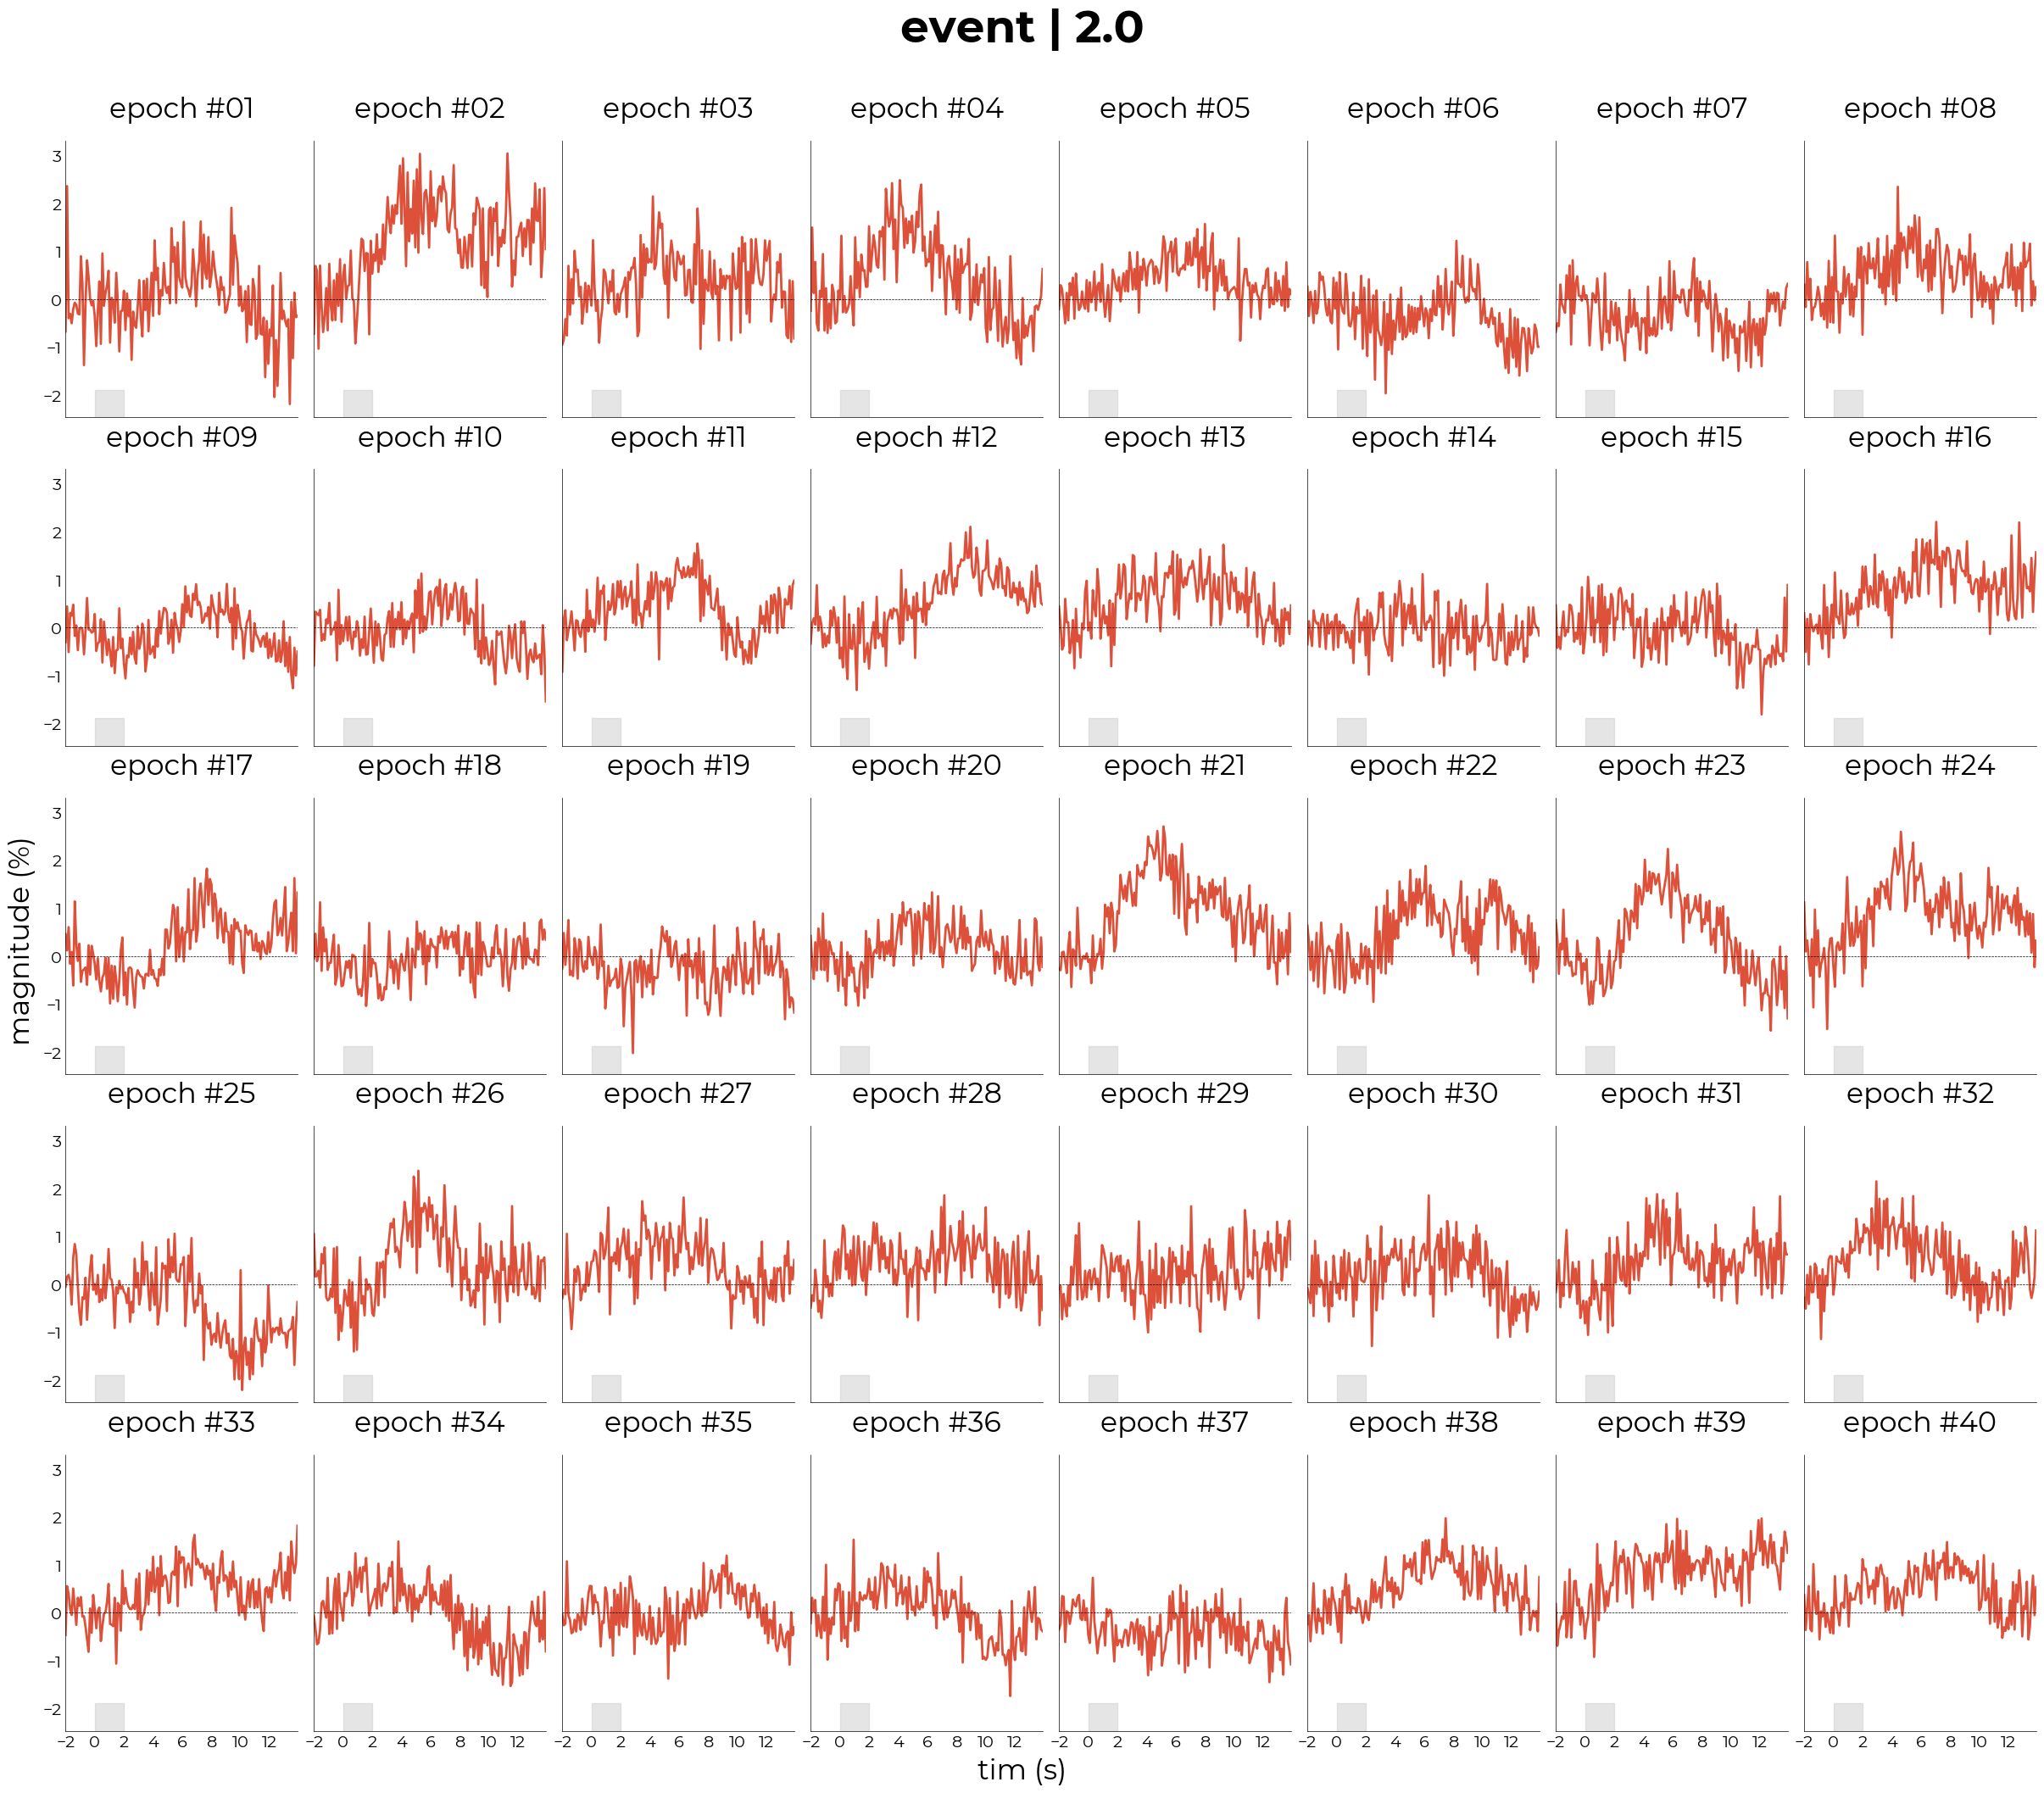

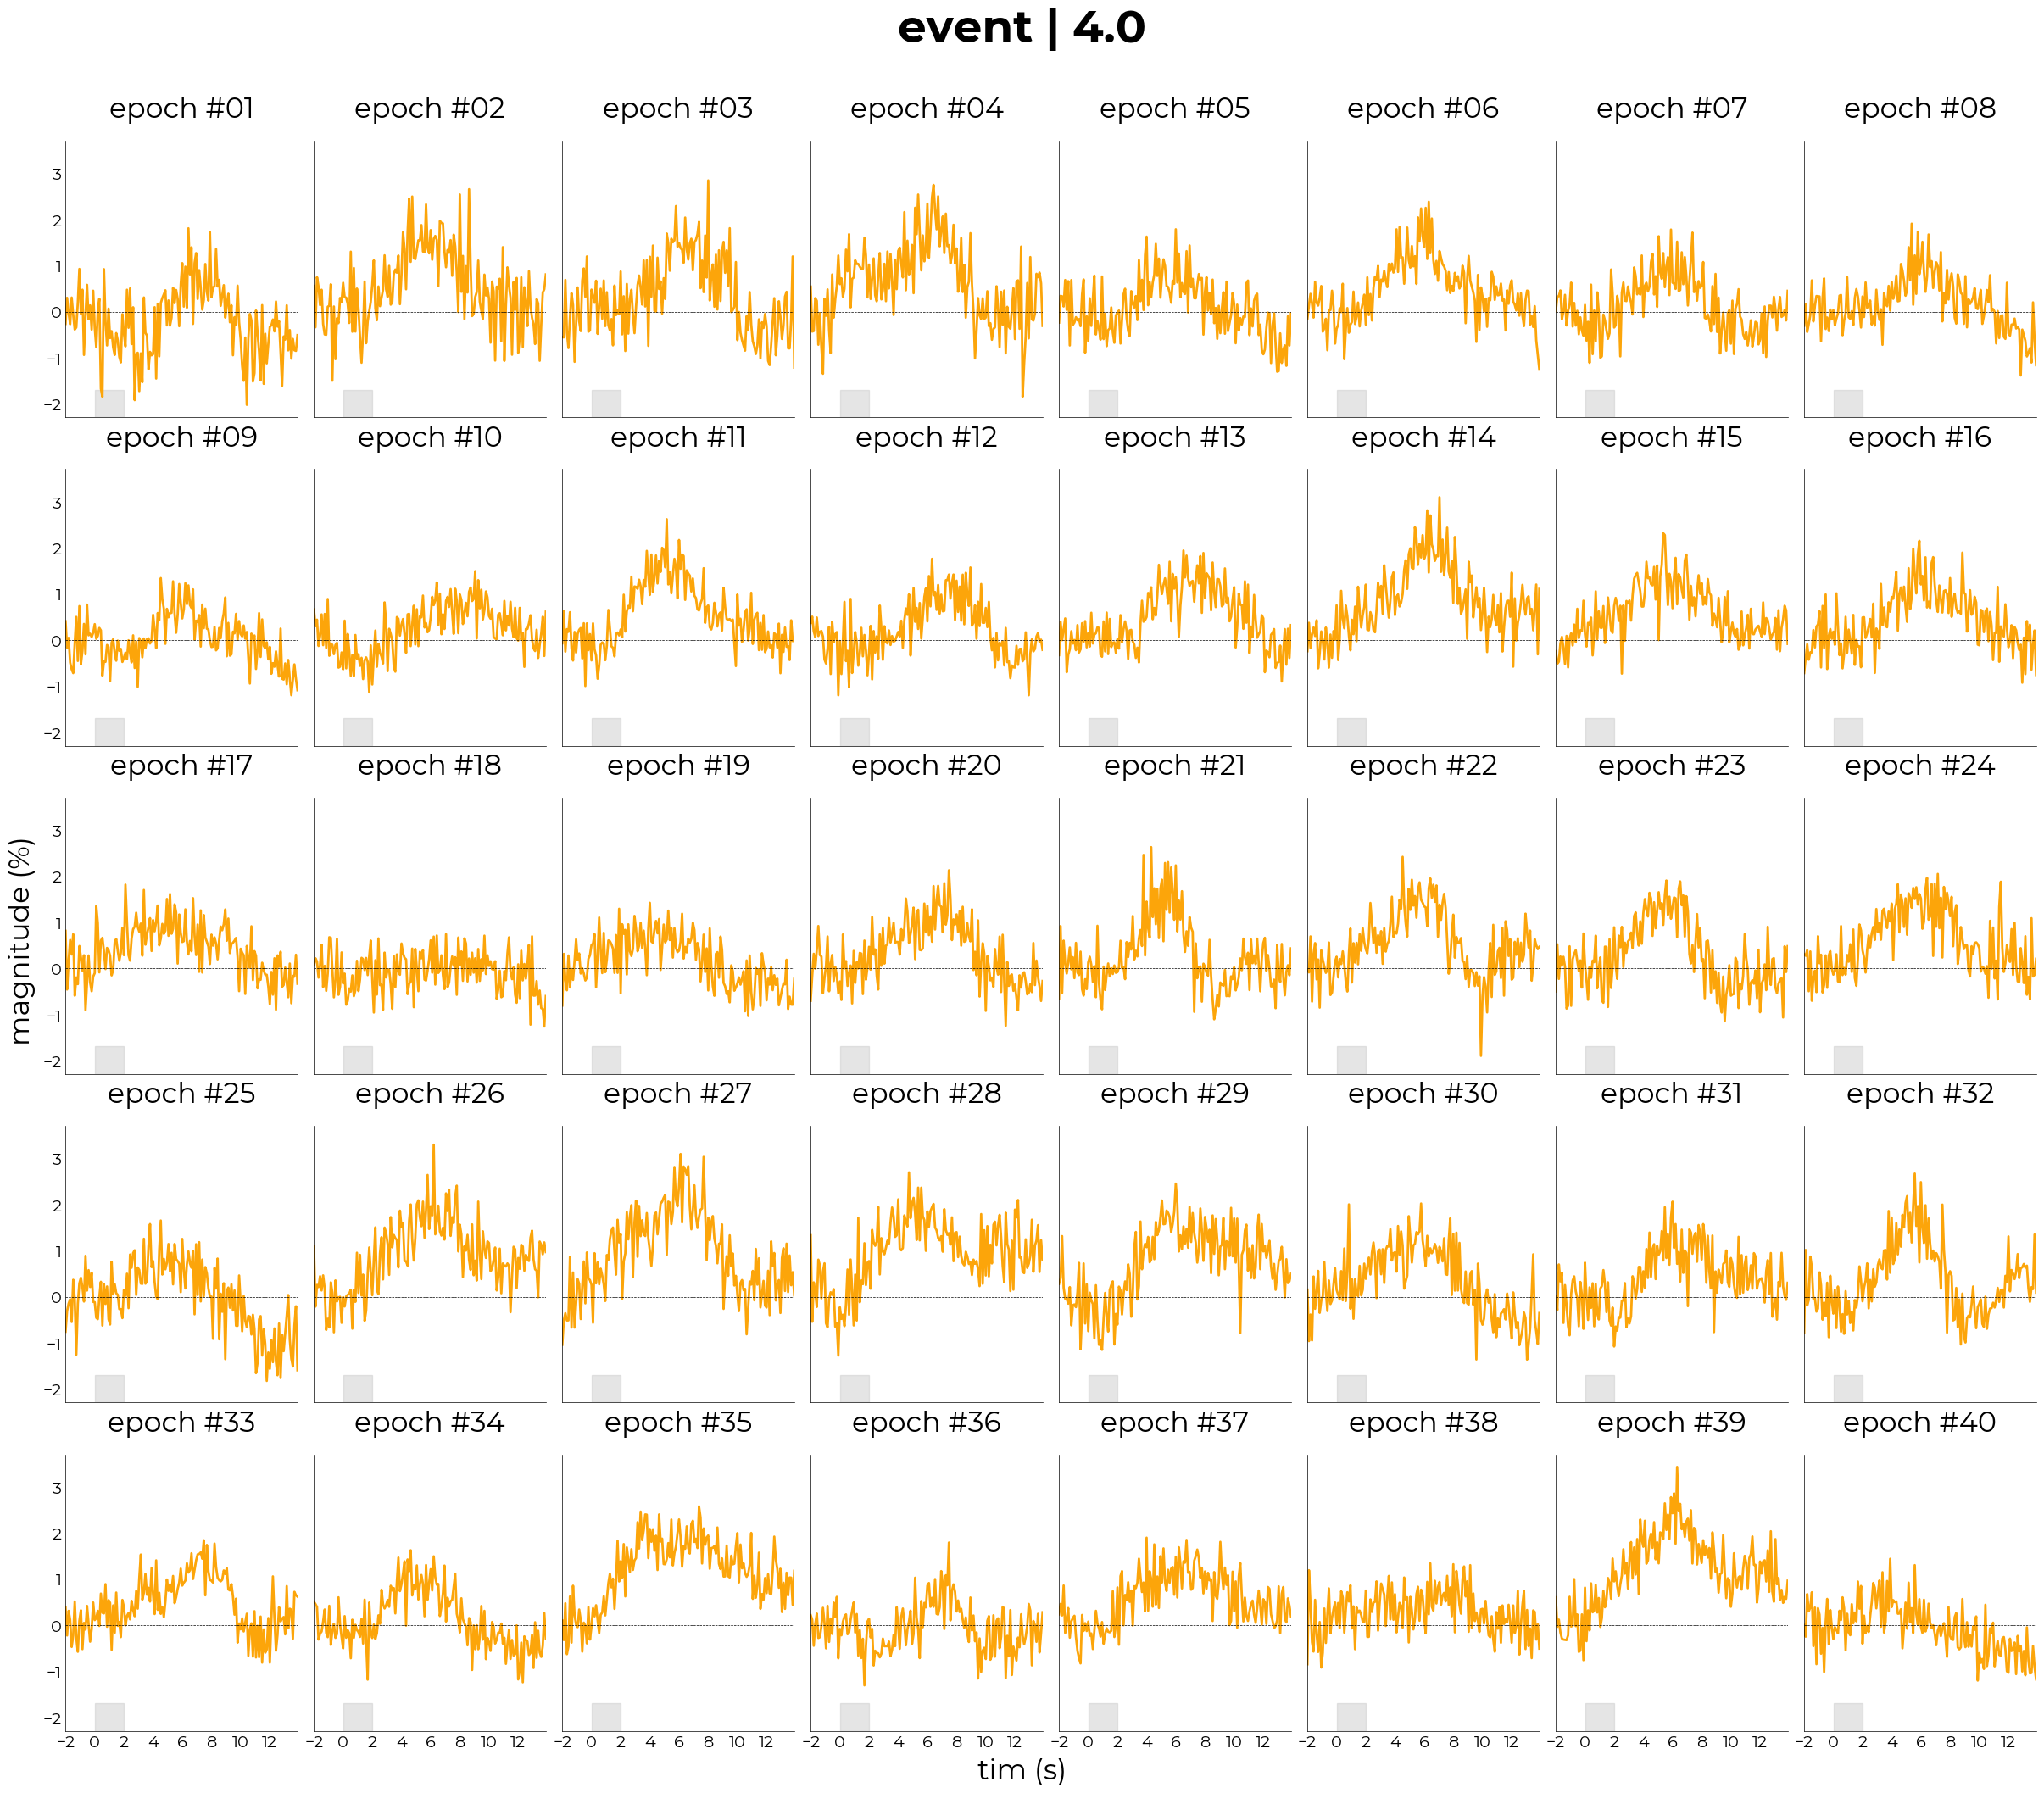

In [155]:
interval = [-2,14]
n_events = utils.get_unique_ids(epoch_all_runs, id="event_type")
n_runs = utils.get_unique_ids(epoch_all_runs, id="run")

ncols = 8
colors = sns.color_palette("inferno", len(n_events))

for ix,ev in enumerate(n_events):
# for ix,ev in enumerate([n_events[0]]):
    total_plots = epoch_all_runs.shape[-1]*len(n_runs)
    nrows = int(np.ceil(total_plots/ncols))
    fig,axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(24,nrows*4), constrained_layout=True, sharey=True, sharex=True)

    ev_df = utils.select_from_df(epoch_all_runs, expression=f"event_type = {ev}")
    run_ids = utils.get_unique_ids(ev_df, id="run")

    ep_nr = 0
    for run in run_ids:

        run_df = utils.select_from_df(ev_df, expression=f"run = {run}")
        t_ = run_df.index.get_level_values("t").to_numpy()
        for ep in range(run_df.shape[-1]):

            data = run_df[ep].values

            d_ = data = run_df[ep].values
            m_ = d_[:20].mean()
            if m_ < 0:
                d_shift = d_+abs(m_)
            else:
                d_shift = d_-m_    

            ax = axs.flatten()[ep_nr]
            pl = plotting.LazyPlot(
                d_shift,
                xx=t_,
                axs=ax,
                color=colors[ix],
                add_hline=0,
                x_ticks=np.arange(*interval)[::2],
                line_width=2,
                title=f"epoch #{str(ep_nr+1).zfill(len(str(total_plots)))}"
            )

            ax.axvspan(0,2, ymax=0.1, color="#cccccc", alpha=0.5)
            ep_nr += 1

    fig.supylabel("magnitude (%)", fontsize=pl.title_size)
    fig.supxlabel("tim (s)", fontsize=pl.title_size)
    fig.suptitle(f"event | {ev}", fontsize=pl.title_size*1.6, y=1.05, fontweight="bold")

    fname = opj(fig_dir, f"{subject}_ses-{sesID}_ev-{ev}_desc-epochs")
    for ext in ["pdf"]:
        fig.savefig(
            f"{fname}.{ext}",
            bbox_inches="tight",
            dpi=300,
            facecolor="white"
        )

## Deconvolve over depth

In [146]:
# deconvolve
can_fit = fitting.NideconvFitter(
    df_f,
    utils.select_from_df(df_s, expression=("event_type != response","&","event_type != blink")), 
    basis_sets='canonical_hrf_with_time_derivative', #_dispersion',
    # basis_sets="fourier",
    # n_regressors=4,
    TR=0.105,
    interval=[0,20],
    verbose=True,
    conf_intercept=True,
)
can_fit.timecourses_condition()

Selected 'canonical_hrf_with_time_derivative'-basis sets (with 2 regressors)
Adding event '0.7' to model
Adding event '1.0' to model
Adding event '2.0' to model
Adding event '4.0' to model
Fitting with 'ols' minimization
Done


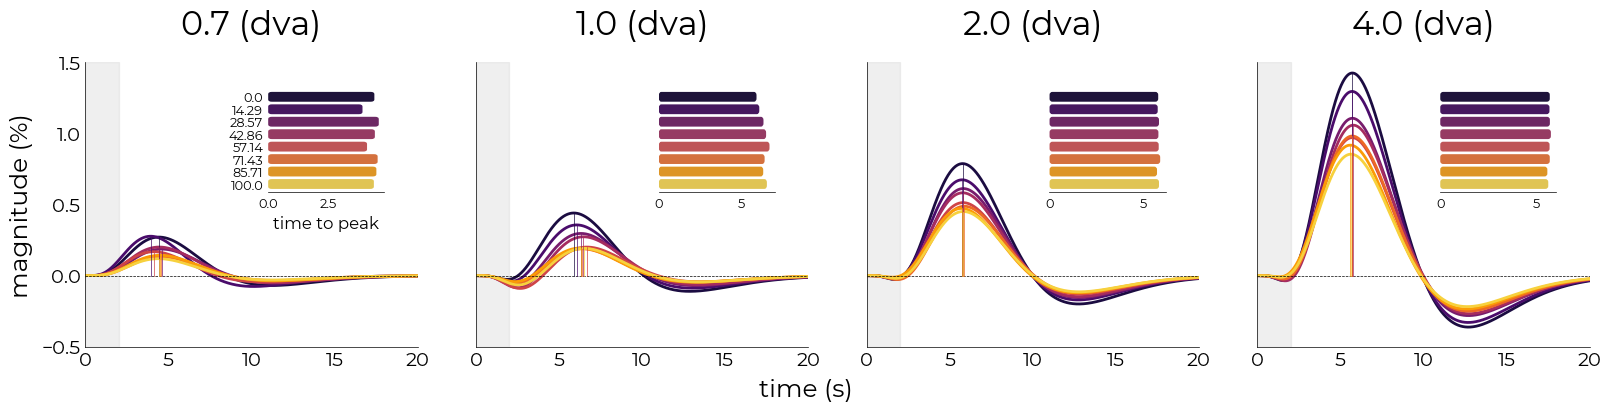

In [148]:
depth = np.linspace(0,100,num=can_fit.tc_condition.shape[-1])
depth

figsize = (len(can_fit.cond)*4,4)
fig,axs = plt.subplots(
    ncols=len(can_fit.cond), 
    figsize=figsize, 
    gridspec_kw={"wspace": 0.1}, 
    sharey=True, 
    constrained_layout=True
)

for ix,ev in enumerate(can_fit.cond):
    # if ix+1 == len(can_fit.cond):
    # if ix == 0:
    #     lbl = [f"{round(i,2)}%" for i in depth]
    # else:
    lbl = None
        
    df = utils.select_from_df(can_fit.tc_condition, expression=f"event_type = {ev}")
    ev_prof = list(df.values.T)
    pl = plotting.LazyPlot(
        ev_prof,
        xx=df.index.get_level_values("time").values,
        line_width=2,
        axs=axs[ix],
        title=f"{round(float(ev),2)} (dva)",
        add_hline=0,
        x_ticks=[0,5,10,15,20],
        # y_ticks=[-0.25,0,1],
        labels=lbl,
        cmap="inferno",
        y_lim=[-0.5,1.5]
        # legend_kwargs={"fontsize": 11}
    )

    axs[ix].axvspan(0,2, ymax=1, alpha=0.3, color="#cccccc")

    if ix == 0:
        lbl = [str(round(float(i),2)) for i in depth]
        x_lbl = "time to peak"
        add_lbl = True
    else:
        lbl = None
        x_lbl = None
        add_lbl = False

    left,bottom,width,height = 0.55,0.55,0.35,0.35
    ax2 = axs[ix].inset_axes([left, bottom, width, height])
    can_fit.plot_ttp(
        df,
        axs=ax2,
        hrf_axs=pl.axs,
        ttp_lines=True,
        font_size=pl.font_size/1.5,
        label_size=pl.label_size/1.5,
        fancy=True,
        sns_offset=1.5,
        add_labels=add_lbl,
        ttp_labels=lbl,
        x_label=x_lbl,
        cmap="inferno"
    )

    # can_fit.plot_fwhm(
    #     df,
    #     axs=ax2,
    #     hrf_axs=axs[ix],
    #     fwhm_lines=True,
    #     font_size=pl.font_size/1.5,
    #     label_size=pl.label_size/1.5,
    #     fancy=True,
    #     sns_offset=1.5,
    #     add_labels=add_lbl,
    #     fwhm_labels=lbl,
    #     x_label=x_lbl
    # )    

fig.supxlabel("time (s)", fontsize=pl.font_size)
fig.supylabel("magnitude (%)", fontsize=pl.font_size)
fig.show()

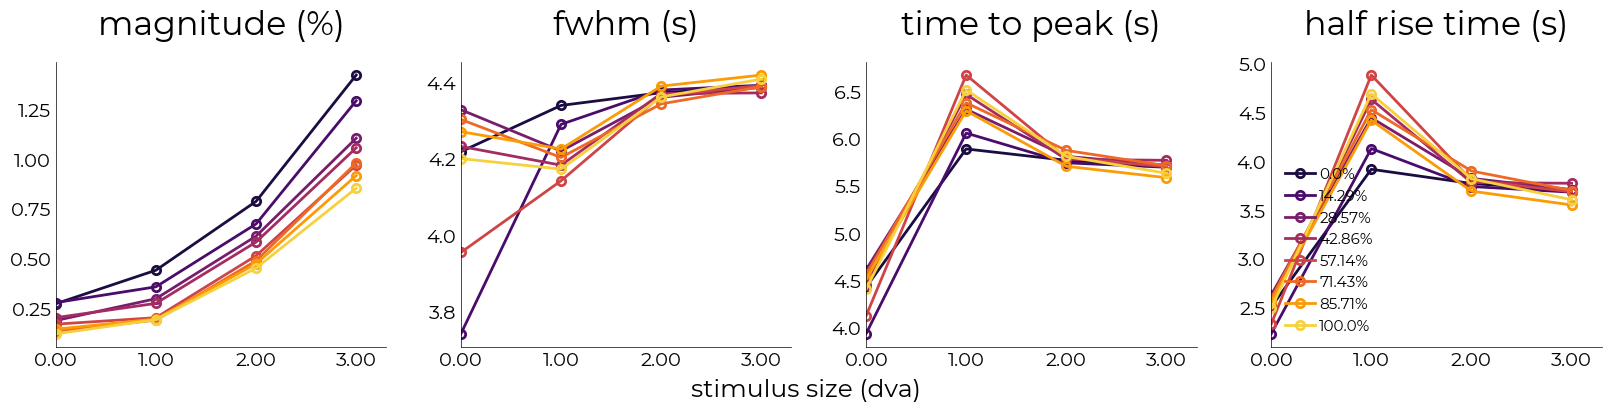

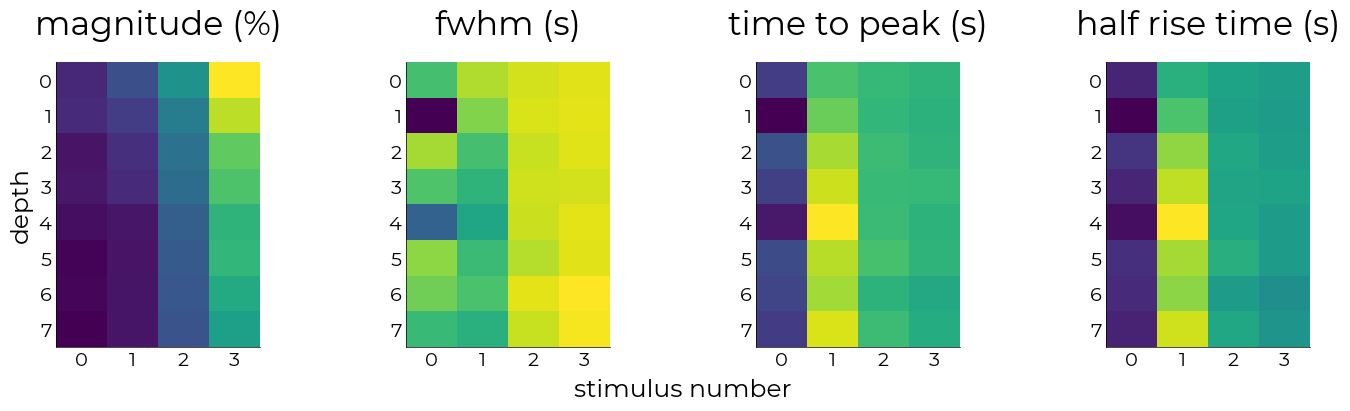

In [150]:
from holeresponse import viz

df_pars = []
for ix,ev in enumerate(can_fit.cond):
    pars = fitting.HRFMetrics(utils.select_from_df(can_fit.tc_condition, expression=f"event_type = {ev}")).return_metrics()
    pars["sizes"] = ix
    pars["depth"] = depth
    df_pars.append(pars)
df_pars = pd.concat(df_pars, ignore_index=False)
df_pars.head()

stim_pars = viz.PlotStimPars(df=df_pars)
stim_pars.plot_metrics_across_stims(
    fig_kwargs={"gridspec_kw": {"wspace": 0.1}},
    legend_kwargs={"fontsize": 11},
    plot_kw={
        "markerfacecolor": "none",
        "markeredgewidth": 2
    }
)

stim_pars.imshow_metrics_across_stims(aspect=0.7)

In [ ]:

# deconvolve
lump_fit = fitting.NideconvFitter(
    df_f,
    df_s, #, expression="event_type != response"), 
    basis_sets='canonical_hrf_with_time_derivative', #_dispersion',
    TR=0.105,
    interval=[0,25],
    verbose=True,
    # conf_intercept=True,
    add_intercept=True,
    fit=True
)

#plot
fig,axs = plt.subplots(figsize=(6,6))
lump_fit.plot_average_per_event(
    x_label="time (s)",
    add_offset=False,
    y_label="magnitude (%)",
    add_hline='default',
    axs=axs,
    title=f"average 10 runs",
    labels=lump_fit.cond,
    line_width=2,
    cmap='inferno',
    fancy=True)

# fname = opj(fig_dir, f"{subject}_ses-{sesID}_desc-deconvolved")
# for ext in ["pdf"]:
#     fig.savefig(
#         f"{fname}.{ext}",
#         bbox_inches="tight",
#         dpi=300,
#         facecolor="white"
#     )     

Selected 'canonical_hrf_with_time_derivative'-basis sets (with 2 regressors)
Adding event '0.7' to model


Adding event '1.0' to model
Adding event '2.0' to model
Adding event '4.0' to model
Fitting with 'ols' minimization
Done
Selected 'canonical_hrf_with_time_derivative'-basis sets (with 2 regressors)
Adding event '0.7' to model
Adding event '1.0' to model
Adding event '2.0' to model
Adding event '4.0' to model
Fitting with 'ols' minimization
Done
Selected 'canonical_hrf_with_time_derivative'-basis sets (with 2 regressors)
Adding event '0.7' to model
Adding event '1.0' to model
Adding event '2.0' to model
Adding event '4.0' to model
Fitting with 'ols' minimization
Done
Selected 'canonical_hrf_with_time_derivative'-basis sets (with 2 regressors)
Adding event '0.7' to model
Adding event '1.0' to model
Adding event '2.0' to model
Adding event '4.0' to model
Fitting with 'ols' minimization
Done
Selected 'canonical_hrf_with_time_derivative'-basis sets (with 2 regressors)
Adding event '0.7' to model
Adding event '1.0' to model
Adding event '2.0' to model
Adding event '4.0' to model
Fitting with

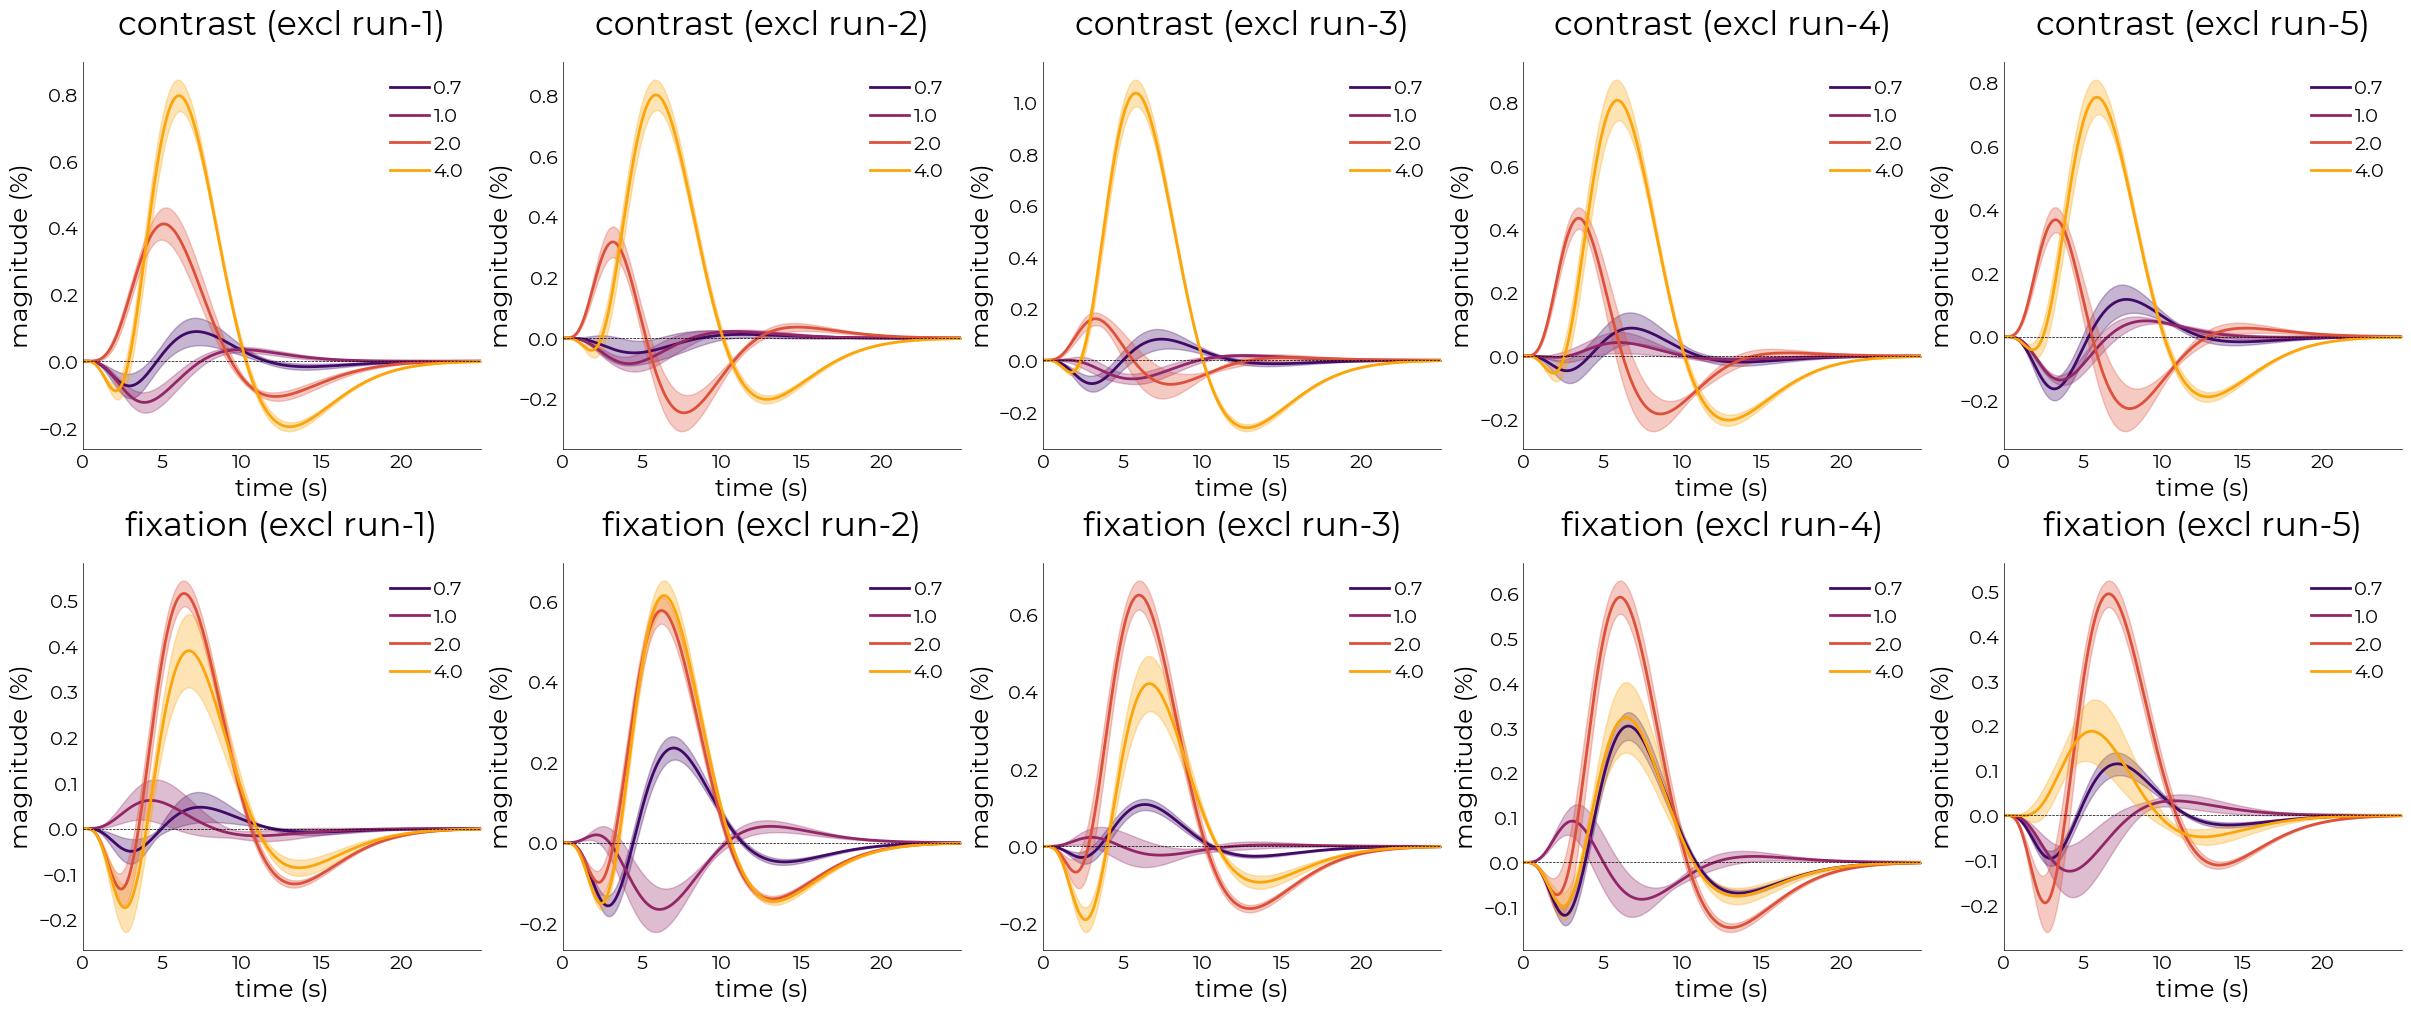

In [98]:
fig,axs = plt.subplots(ncols=5,nrows=2, figsize=(24,10), constrained_layout=True)
for t_ix,task in enumerate(utils.get_unique_ids(df_func, id="task")):

    df_fix = utils.select_from_df(df_ribbon, expression=f"task = {task}")
    stim_fix = utils.select_from_df(df_onsets, expression=(f"task = {task}","&","event_type != response"))

    # fit events on averaged data
    for ix,i in enumerate(utils.get_unique_ids(df_fix, id="run")):
        expr = f"run != {i}"
        can_fit = fitting.NideconvFitter(
            utils.select_from_df(df_fix, expression=expr),
            utils.select_from_df(stim_fix, expression=expr), 
            basis_sets='canonical_hrf_with_time_derivative', #_dispersion',
            # n_regressors=4,
            TR=0.105,
            interval=[0,25],
            verbose=True,
            # conf_intercept=True,
            add_intercept=True,
            fit=True
        )

        can_fit.plot_average_per_event(
            x_label="time (s)",
            add_offset=False,
            y_label="magnitude (%)",
            add_hline='default',
            axs=axs[t_ix,ix],
            title=f"{task} (excl run-{i})",
            labels=[round(float(i),2) for i in can_fit.cond],
            line_width=2,
            cmap='inferno',
            fancy=True)

fname = opj(fig_dir, f"{subject}_ses-{sesID}_desc-deconvolved_excl_runs")
for ext in ["pdf"]:
    fig.savefig(
        f"{fname}.{ext}",
        bbox_inches="tight",
        dpi=300,
        facecolor="white"
    )             